In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,NaN,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,NaN,1.17850,NaN,1.38880,3.21670,2.92360,NaN,0.641450
2,-0.169460,NaN,NaN,3.06500,NaN,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,NaN
3,-0.136050,0.47279,NaN,1.95630,NaN,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,NaN,3.554100,NaN,0.37425,2.17860,1.31400,1.06320,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,NaN,3.231100,0.005387
796,3.466600,NaN,3.100400,1.34610,NaN,NaN,0.39613,2.39610,2.46350,NaN,NaN,1.226700
797,NaN,-2.38430,2.031000,NaN,3.341200,1.53700,1.22560,0.74027,2.49540,NaN,NaN,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,NaN,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	168
float64		column 2	176
float64		column 3	143
float64		column 4	147
float64		column 5	154
float64		column 6	174
float64		column 7	160
float64		column 8	148
float64		column 9	155
float64		column 10	159
float64		column 11	186
float64		column 12	150


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,632.000000,624.000000,657.000000,653.000000,646.000000,626.000000,640.000000,652.000000,645.000000,641.000000,614.000000,650.000000
mean,1.502132,1.392983,1.975688,1.947112,2.002525,2.000155,1.987769,1.991627,2.020230,1.996681,1.940179,1.961005
std,2.768192,3.581705,1.144289,1.159042,1.160065,1.142833,1.173314,1.142021,1.130881,1.161800,1.186442,1.129366
min,-4.442100,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.002088
25%,-0.442393,-0.508485,1.020600,0.956610,0.984783,1.014625,0.983375,0.948560,1.106700,1.020400,0.855675,1.005900
50%,0.523955,2.352400,1.965700,1.930100,2.044150,1.987050,2.011500,2.008900,2.013700,2.014600,1.927600,1.922400
75%,4.023250,4.531350,2.919600,2.954800,3.001000,3.029900,3.019950,2.928700,3.005200,2.996400,3.014925,2.893200
max,6.982200,7.691000,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

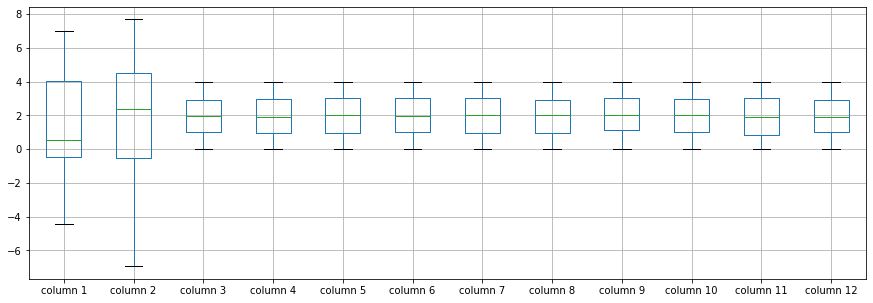

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.502132
column 2     1.392983
column 3     1.975688
column 4     1.947112
column 5     2.002525
column 6     2.000155
column 7     1.987769
column 8     1.991627
column 9     2.020230
column 10    1.996681
column 11    1.940179
column 12    1.961005
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.428111,-0.015455,0.014474,0.001010,0.053799,-0.015626,0.015175,-0.021376,-0.001190,0.069900,0.050277
column 2,-0.428111,1.000000,0.080369,-0.021213,-0.070707,0.010809,0.016556,0.012368,0.016067,-0.060619,-0.097559,0.012357
column 3,-0.015455,0.080369,1.000000,-0.048518,0.045132,0.044854,0.019098,0.020748,-0.052693,0.041217,-0.029475,-0.008330
column 4,0.014474,-0.021213,-0.048518,1.000000,0.041971,0.010012,0.050143,0.083687,-0.055130,0.038204,0.065351,-0.025016
column 5,0.001010,-0.070707,0.045132,0.041971,1.000000,0.038100,0.050369,0.012340,-0.048303,-0.038254,-0.037974,0.013724
column 6,0.053799,0.010809,0.044854,0.010012,0.038100,1.000000,-0.068119,0.101146,0.017583,0.010896,-0.105022,-0.009737
column 7,-0.015626,0.016556,0.019098,0.050143,0.050369,-0.068119,1.000000,-0.089091,-0.007660,-0.087237,-0.064818,-0.026365
column 8,0.015175,0.012368,0.020748,0.083687,0.012340,0.101146,-0.089091,1.000000,-0.071200,-0.070201,-0.006522,-0.044177
column 9,-0.021376,0.016067,-0.052693,-0.055130,-0.048303,0.017583,-0.007660,-0.071200,1.000000,0.024866,-0.018661,-0.053687
column 10,-0.001190,-0.060619,0.041217,0.038204,-0.038254,0.010896,-0.087237,-0.070201,0.024866,1.000000,-0.044981,0.064410


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+89,12+89+89,12+89+89+89,12+89+89+89+89,12+89+89+89,12+89+89,12+89,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 23.60709976196289
Epoch: 1 , loss: 23.20126708984375
Epoch: 2 , loss: 20.88369358062744
Epoch: 3 , loss: 19.25887004852295
Epoch: 4 , loss: 18.67478931427002
Epoch: 5 , loss: 18.29334503173828
Epoch: 6 , loss: 17.878313541412354
Epoch: 7 , loss: 17.679501304626466
Epoch: 8 , loss: 17.370817699432372
Epoch: 9 , loss: 17.071424102783205
Epoch: 10 , loss: 16.798085136413576
Epoch: 11 , loss: 16.755096893310547
Epoch: 12 , loss: 16.65627317428589
Epoch: 13 , loss: 16.545900135040284
Epoch: 14 , loss: 16.30195020675659
Epoch: 15 , loss: 16.147617130279542
Epoch: 16 , loss: 16.273151512145997
Epoch: 17 , loss: 16.163390979766845
Epoch: 18 , loss: 15.952418251037598
Epoch: 19 , loss: 16.020605754852294
Epoch: 20 , loss: 15.88291124343872
Epoch: 21 , loss: 15.832248363494873
Epoch: 22 , loss: 15.891075191497803
Epoch: 23 , loss: 15.930984268188476
Epoch: 24 , loss: 15.830204181671142
Epoch: 25 , loss: 15.77386

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     1.411152
column 5     2.475300
column 6     1.451374
column 7     1.670000
column 8     1.422107
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.560193,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.385303,0.000000,-0.857869,0.0,0.000000,0.000000,0.005580,0.000000
2,0.000000,0.567230,-0.846997,0.000000,0.031863,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.260874
3,0.000000,0.000000,2.104430,0.000000,-0.093026,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,-0.162595,0.000000,-0.819430,0.000000,0.0,0.000000,0.000000,0.339691,-0.737872
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.304920,0.000000,0.000000
796,0.000000,5.104693,0.000000,0.000000,0.238059,-0.719414,0.000000,0.0,0.000000,-0.041170,-0.913956,0.000000
797,-2.526972,0.000000,0.000000,-1.115066,0.000000,0.000000,0.000000,0.0,0.000000,-0.147544,-0.545208,0.000000
798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-1.135711,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(82.77525688246648, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.3334726741876216

In [18]:
new_df.iloc[66,:]

column 1     0.207620
column 2    -0.550520
column 3     1.972051
column 4     1.794800
column 5     1.401300
column 6     2.062579
column 7     2.045569
column 8     2.018089
column 9     1.059400
column 10    2.077280
column 11    1.879400
column 12    0.575240
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.533700,0.469590,0.679080,3.434400,2.79240,1.216107,1.699100,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,2.921600,0.810023,1.178500,0.822331,1.38880,3.216700,2.923600,0.778490,0.641450
2,-0.169460,1.068760,1.623903,3.065000,1.599463,1.482400,0.921600,2.64240,1.518700,2.531800,2.432800,1.615926
3,-0.136050,0.472790,2.692520,1.956300,2.693974,2.595700,2.893300,1.53750,0.999420,3.659300,0.618250,3.265800
4,0.098830,0.234180,0.429700,1.468605,3.554100,1.451670,0.374250,2.17860,1.314000,1.063200,1.366591,1.450528
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.556120,0.070769,2.074700,0.803040,3.22290,3.493300,1.020580,3.231100,0.005387
796,3.466600,1.070093,3.100400,1.346100,1.615359,1.569286,0.396130,2.39610,2.463500,1.626330,1.547744,1.226700
797,0.817828,-2.384300,2.031000,1.149534,3.341200,1.537000,1.225600,0.74027,2.495400,1.195756,1.077292,1.585300
798,3.441400,-5.216300,1.577000,1.844000,1.098700,3.424300,0.810810,3.72700,1.187900,0.951120,0.748789,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_C_20(imp).xlsx", index=False, header=False)